In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

# MLB Team Pitching Stats 2010-2019

In [12]:
pitch_2010 = pd.read_csv("pitching_2010.csv")
pitch_2011 = pd.read_csv("pitching_2011.csv")
pitch_2012 = pd.read_csv("pitching_2012.csv")
pitch_2013 = pd.read_csv("pitching_2013.csv")
pitch_2014 = pd.read_csv("pitching_2014.csv")
pitch_2015 = pd.read_csv("pitching_2015.csv")
pitch_2016 = pd.read_csv("pitching_2016.csv")
pitch_2017 = pd.read_csv("pitching_2017.csv")
pitch_2018 = pd.read_csv("pitching_2018.csv")
pitch_2019 = pd.read_csv("pitching_2019.csv")
combined = pd.concat([pitch_2010, pitch_2011, pitch_2012, pitch_2013, pitch_2014, pitch_2015, pitch_2016, pitch_2017, pitch_2018, pitch_2019],ignore_index=True)


In [13]:
combined.IP.replace(' ', inplace=True)
combined.IP = combined.IP.str.replace(',', '')
combined.IP = combined.IP.astype(float)

combined.PA.replace(' ', inplace=True)
combined.PA = combined.PA.str.replace(',', '')
combined.PA = combined.PA.astype(float)


In [14]:
combined

,#,LVL,YEAR,TEAM,IP,PA,R,ERA,FIP,cFIP,...,oppAVG,oppOBP,oppSLG,oppOPS,WHIP,DRA,DRA-,DRA_START,DRA_RELIEF,PWARP
0,1,MLB,2010,Angels,1449.3,6252.0,702,4.04,4.08,102,...,0.000,0.000,0.000,0.000,1.37,4.47,101,0.00,0.00,11.60
1,2,MLB,2010,Twins,1452.7,6106.0,671,3.95,3.88,97,...,0.000,0.000,0.000,0.000,1.29,4.35,98,0.00,0.00,13.39
2,3,MLB,2010,Yankees,1442.3,6102.0,693,4.06,4.31,105,...,0.000,0.000,0.000,0.000,1.31,4.46,101,0.00,0.00,11.52
3,4,MLB,2010,Mets,1453.0,6245.0,652,3.70,4.01,99,...,0.000,0.000,0.000,0.000,1.36,4.36,98,0.00,0.00,13.27
4,5,MLB,2010,Athletics,1431.7,6011.0,626,3.56,4.09,98,...,0.000,0.000,0.000,0.000,1.28,4.07,92,0.00,0.00,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,26,MLB,2019,Tigers,1433.0,6341.0,915,5.24,4.87,104,...,0.256,0.324,0.442,0.766,1.46,5.59,115,5.73,5.41,-0.12
296,27,MLB,2019,Astros,1462.3,5995.0,640,3.66,4.01,90,...,0.250,0.321,0.435,0.756,1.13,4.10,84,3.76,4.67,23.94
297,28,MLB,2019,Royals,1425.0,6307.0,869,5.20,4.93,109,...,0.256,0.323,0.442,0.765,1.48,6.00,123,6.24,5.64,-6.21
298,29,MLB,2019,Dodgers,1445.7,5913.0,613,3.37,3.68,89,...,0.250,0.318,0.426,0.744,1.10,3.58,74,3.25,4.11,31.87


In [15]:
combined.dtypes

#                  int64
LVL               object
YEAR               int64
TEAM              object
IP               float64
PA               float64
R                  int64
ERA              float64
FIP              float64
cFIP               int64
cFIP_START         int64
cFIP_RELIEF        int64
FIP_MINUS_ERA    float64
SO9              float64
BB9              float64
SO/BB            float64
HR9              float64
oppAVG           float64
oppOBP           float64
oppSLG           float64
oppOPS           float64
WHIP             float64
DRA              float64
DRA-               int64
DRA_START        float64
DRA_RELIEF       float64
PWARP            float64
dtype: object

1. With a barplot what is the average amount of runs each team gave up per season?

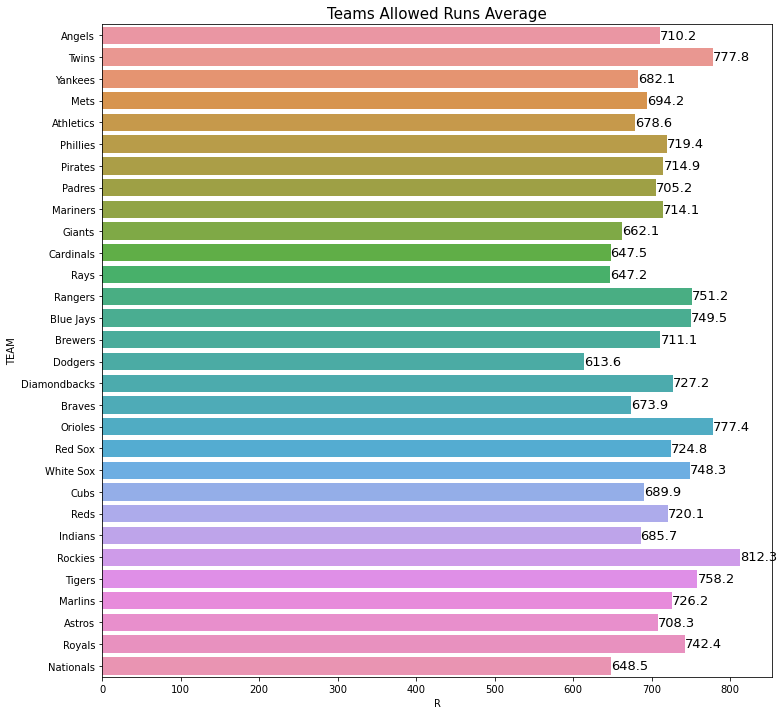

In [19]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x=combined.R ,y= combined.TEAM,
data = combined,
ci=None)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Teams Allowed Runs Average",fontsize=15);


2. With a lineplot show the ERA for the Cardinals and the Cubs throught all the years?

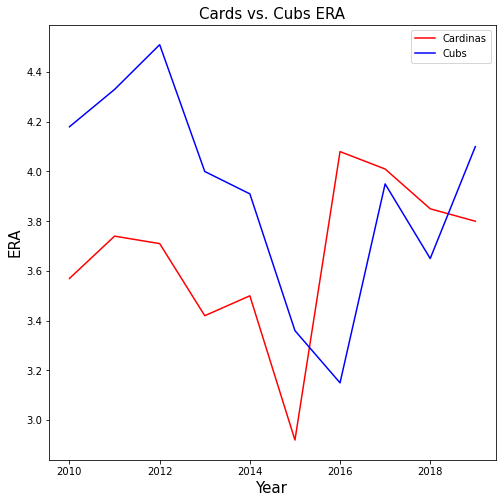

In [21]:
x = combined.YEAR.unique()
y = combined[combined.TEAM == 'Cardinals'].ERA
z = combined[combined.TEAM == 'Cubs'].ERA
plt.figure(figsize=(8, 8))
plt.plot(x,y, color=('red'))
plt.plot(x,z,color='blue')
plt.legend(["Cardinas", "Cubs"])
plt.xlabel("Year",fontsize=15)
plt.ylabel("ERA",fontsize=15)
plt.title("Cards vs. Cubs ERA",fontsize=15)
plt.show()

3. With a scatterplot what is the correrlation between strikeouts per nine (SO9) and the innings pitched (IP) for all teams in the 2018 season?
 - Note that  SO9 is determined by multiplying the number of strikeouts by 9, and then dividing by the number of innings pitched.

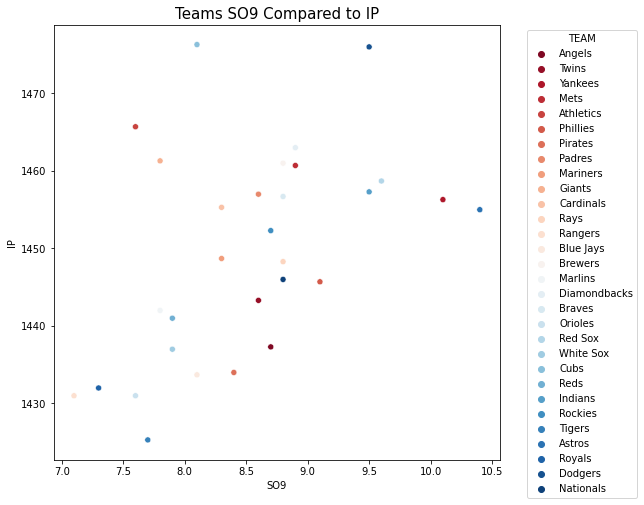

In [31]:
plt.figure(figsize=(8, 8))
year_team = combined[combined.YEAR == 2018].TEAM
ax =sns.scatterplot(x=combined[combined.YEAR == 2018].SO9, y=combined[combined.YEAR == 2018].IP,hue=year_team, ci= None, palette=("RdBu"));
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.title("Teams SO9 Compared to IP",fontsize=15);

4. Who was the top 3 teams with lowest WHIP for the 2012 season?
- Note that whip stands for walks and hits per inning pitched.

In [38]:
team_whip = combined[(combined.YEAR == 2012)]
team_whip.sort_values('WHIP').groupby(team_whip['TEAM']).tail(1).sort_values('WHIP').head(3)

,#,LVL,YEAR,TEAM,IP,PA,R,ERA,FIP,cFIP,...,oppAVG,oppOBP,oppSLG,oppOPS,WHIP,DRA,DRA-,DRA_START,DRA_RELIEF,PWARP
71,12,MLB,2012,Rays,1459.7,6000.0,577,3.19,3.46,91,...,0.0,0.0,0.0,0.0,1.17,3.57,82,0.0,0.0,25.39
89,30,MLB,2012,Nationals,1468.3,6133.0,594,3.33,3.58,93,...,0.0,0.0,0.0,0.0,1.22,3.75,86,0.0,0.0,22.30
82,23,MLB,2012,Reds,1453.0,6056.0,588,3.34,3.76,96,...,0.0,0.0,0.0,0.0,1.23,4.09,94,0.0,0.0,16.67


5. What is the teams average against other teams for the seasons of 2016 and up?

In [52]:
combined[(combined.YEAR >= 2016) ].groupby('TEAM').agg({"oppAVG":['mean'],
'oppOBP': 'mean',
'oppSLG':'mean',
'oppOPS':'mean'
})

,oppAVG,oppOBP,oppSLG,oppOPS
,mean,mean,mean,mean
TEAM,,,,
Angels,0.25500,0.32375,0.43250,0.75600
Astros,0.25275,0.32075,0.42575,0.74625
Athletics,0.25400,0.32225,0.42675,0.74900
Blue Jays,0.25500,0.32225,0.42800,0.75025
Braves,0.25125,0.31875,0.41700,0.73575
Brewers,0.25200,0.32000,0.41600,0.73600
Cardinals,0.25100,0.31975,0.41575,0.73600
Cubs,0.25025,0.31800,0.41425,0.73225


6. For the seasons that the Pirates pitched more than 1450 innings what was the average walks per 9 (BB9)?

In [66]:
combined[(combined["TEAM"]== 'Pirates') & (combined["IP"] > 1450)].groupby('YEAR').agg({
    'BB9':['mean']
})

,BB9
,mean
YEAR,
2013,3.2
2014,3.1
2015,2.7
2016,3.3


7. 